In [ ]:
#Importation des bibliothèques nécéssaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Chargement des données
df_Marseille=pd.read_excel('../donnees/Marseille_regional.xlsx')

In [ ]:
#Convertir lees coplonnes en valeurs numériques
df_Marseille['vitesse']=pd.to_numeric(df_Marseille['vitesse'], errors='coerce')

In [ ]:
df_Marseille.head()

,vitesse,température,humidité,pression
0,4,18,72,18
1,3,18,73,18
2,3,18,77,18
3,3,17,78,18
4,3,17,77,17


In [ ]:
df_Marseille.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8783 entries, 0 to 8782
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   vitesse      8783 non-null   int64
 1   température  8783 non-null   int64
 2   humidité     8783 non-null   int64
 3   pression     8783 non-null   int64
dtypes: int64(4)
memory usage: 274.6 KB


In [ ]:
df_Marseille.describe()

,vitesse,température,humidité,pression
count,8783.000000,8783.000000,8783.000000,8783.000000
mean,9.853353,17.021747,64.208812,23.374132
std,7.060828,5.704430,12.487037,84.389491
min,0.000000,4.000000,25.000000,0.000000
25%,4.000000,12.000000,55.000000,12.000000
50%,8.000000,17.000000,64.000000,15.000000
75%,14.000000,21.000000,73.000000,21.000000
max,42.000000,32.000000,95.000000,999.000000


In [ ]:
#Vérification s'il y a des valeurs NAN dans le data
df_Marseille.isnull().sum()

,0
vitesse,0
température,0
humidité,0
pression,0


In [ ]:
df_PR=pd.read_excel('../donnees/V_PR.xlsx')

In [ ]:
#Convertion des colonnes en valeurs numériques
df_PR['vitesse']=pd.to_numeric(df_PR['vitesse'], errors='coerce')

In [ ]:
df_PR.head()

,vitesse
0,5
1,4
2,4
3,4
4,4


In [ ]:
df_PR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8783 entries, 0 to 8782
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   vitesse  8783 non-null   int64
dtypes: int64(1)
memory usage: 68.7 KB


In [ ]:
df_PR.describe()

,vitesse
count,8783.000000
mean,11.756575
std,8.081426
min,0.000000
25%,5.000000
50%,10.000000
75%,17.000000
max,47.000000


In [ ]:
#Vérification s'il y a des valeurs NAN dans le data
df_PR.isnull().sum()

,0
vitesse,0


**Etablissement d'une relation lineaire univariée**

In [ ]:
#Extraction de la variable et de la cible
V_PR=df_PR['vitesse']
V_Mar=df_Marseille['vitesse']

In [ ]:
#Séparation des données pour l'entrainement et le test
from sklearn.model_selection import train_test_split
V_Mar_train, V_Mar_test, V_PR_train, V_PR_test=train_test_split(V_Mar, V_PR, test_size=0.3, random_state=42)

In [ ]:
#Création d'une reltion linéaire entre la vitesse du vent à la Pointe Rouge et à Marseille
a, b= np.polyfit(V_Mar_train, V_PR_train, deg=1)
print(f"{a:.2f}, {b:.2f}")
y_train=a*V_Mar_train+b

1.12, 0.71


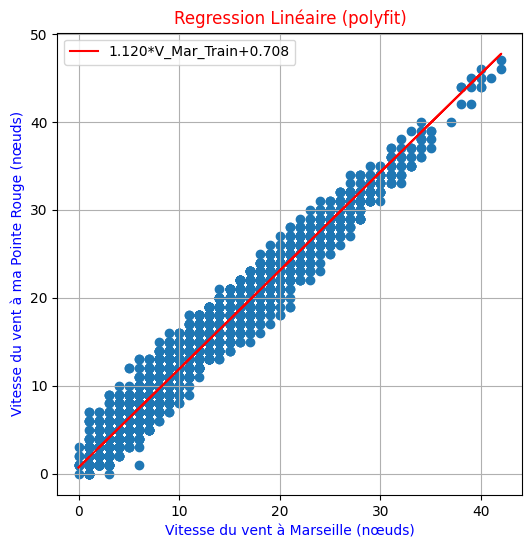

In [ ]:
#Affichage de la relation entre la vitesse à Marseille et la vitesste à la Pointe Rouge
plt.figure(figsize=(6, 6))
plt.scatter(V_Mar_train, V_PR_train)
plt.plot(V_Mar_train, y_train , label=f"{a:.3f}*V_Mar_Train+{b:.3f}", color='r' )
plt.xlabel('Vitesse du vent à Marseille (nœuds)', color='b')
plt.ylabel('Vitesse du vent à ma Pointe Rouge (nœuds)', color='b')
plt.title('Regression Linéaire (polyfit)', color='r')
plt.legend()
plt.grid('True')

In [ ]:
#Fiabilité pour la dataset d'entrainement
from sklearn.metrics import r2_score, mean_squared_error
R2_train=r2_score(y_train, V_PR_train)
MSE_train=mean_squared_error(y_train, V_PR_train)
print(f"R2_train={R2_train:.3f}, MSE_train={MSE_train:.2f}")

R2_train=0.960, MSE_train=2.54


In [ ]:
#relation entre les valeurs prédites et réelles (dataset de l'entrainement)
pente0, intercept0=np.polyfit(V_PR_train, y_train, deg=1 )
y0=pente0*V_PR_train+intercept0

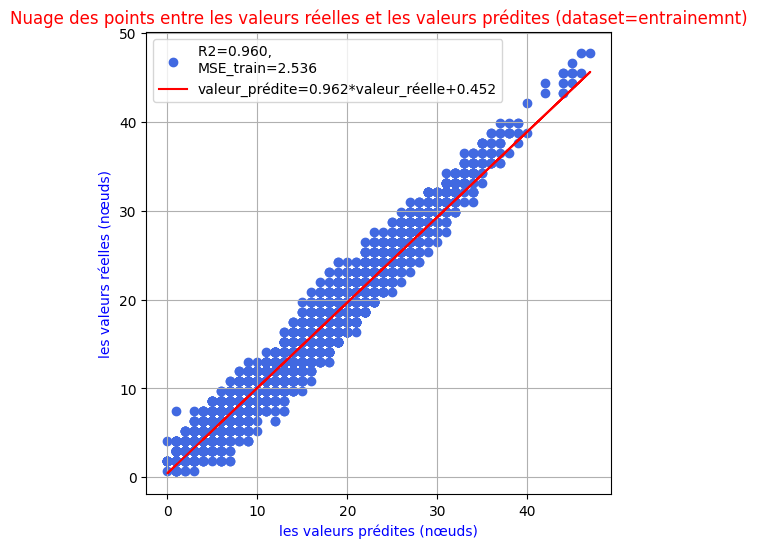

In [ ]:
#Affichage du nuage des points entre les valeurs réelles et les valeurs prédites
plt.figure(figsize=(6 , 6))
plt.scatter( V_PR_train, y_train, color='royalblue', label=f"R2={R2_train:.3f}, \nMSE_train={MSE_train:.3f}")
plt.plot(V_PR_train, y0, label=f"valeur_prédite={pente0:.3f}*valeur_réelle+{intercept0:.3f}", color='r')
plt.xlabel('les valeurs prédites (nœuds)', color='b')
plt.ylabel('les valeurs réelles (nœuds)', color='b')
plt.title('Nuage des points entre les valeurs réelles et les valeurs prédites (dataset=entrainemnt)', color='r')
plt.legend()
plt.grid('True')


In [ ]:
#Test de la fiabilité du modèle
y_test=a*V_Mar_test+b

In [ ]:
R2_test=r2_score(y_test, V_PR_test)
MSE_test=mean_squared_error(y_test, V_PR_test)
print(f"R2_test= {R2_test:.3f}, MSE= {MSE_test:.3f}")

R2_test= 0.957, MSE= 2.617


In [ ]:
#relation entre les valeurs prédites et réelles (dataset de l'entrainement)
pente , intercept =np.polyfit(V_PR_test, y_test, deg=1)
print(f"pente={pente:.3f}, intercept={intercept:.3f}")
y=pente*V_PR_test+intercept

pente=0.954, intercept=0.504


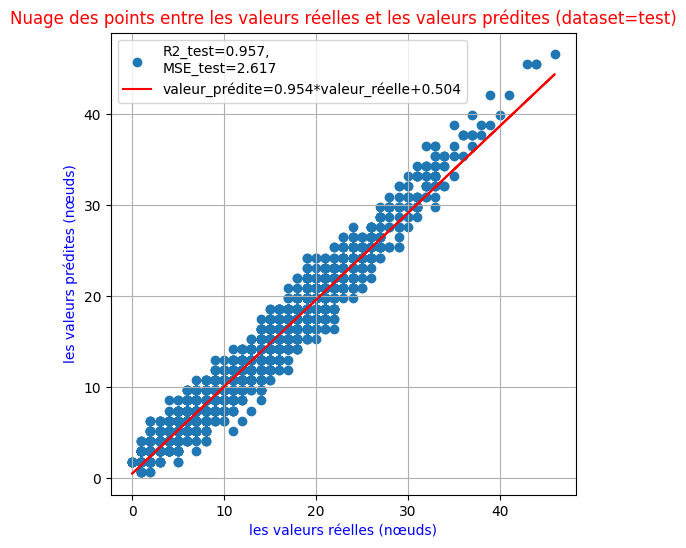

In [ ]:
#Affichage de l'application du modèle sur la dataset test
plt.figure(figsize=( 6, 6))
plt.scatter( V_PR_test, y_test, label=f"R2_test={R2_test:.3f},\nMSE_test={MSE_test:.3f}")
plt.plot(V_PR_test, y, label=f"valeur_prédite={pente:.3f}*valeur_réelle+{intercept:.3f}", color='r')
plt.xlabel('les valeurs réelles (nœuds)', color='b')
plt.ylabel('les valeurs prédites (nœuds)', color='b')
plt.title('Nuage des points entre les valeurs réelles et les valeurs prédites (dataset=test)', color='r')
plt.grid('True')
plt.legend()